## **Snow Prediction Capstone Modeling**

## **Modeling**

### **Overview**
The objective of this step is to:
- Build, evaluate, and select the best model for predicting **Snow Depth**.
- This notebook:
  - Explores two to three models.
  - Applies hyperparameter tuning to optimize model performance.
  - Evaluates models using key performance metrics to determine the most effective solution.


In [141]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [69]:
os.chdir('C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Data')
file_path = 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Data/preprocessed_data.csv'
snow_data = pd.read_csv(file_path)

In [71]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
print(snow_data.head())


         date  elevation  latitude  longitude  snowdepth  precip_accumulation  \
0  2015-01-01       8790  40.59936 -111.58167       34.0                  9.2   
1  2015-01-02       8790  40.59936 -111.58167       33.0                  9.2   
2  2015-01-03       8790  40.59936 -111.58167       32.0                  9.2   
3  2015-01-04       8790  40.59936 -111.58167       31.0                  9.2   
4  2015-01-05       8790  40.59936 -111.58167       31.0                  9.3   

   precip_increment  airtemp_avg  airtemp_max  airtemp_min  airtemp_obs  \
0               0.0         17.8         28.2         11.3         14.7   
1               0.0         19.6         31.8         13.6         16.5   
2               0.0         19.4         25.5         12.9         21.0   
3               0.1         26.1         34.9         13.3         13.8   
4               0.0         34.3         39.0         30.2         30.9   

   soiltemp_obs  soilmoisture_avg  soilmoisture_max  soilmoist

In [73]:
print(snow_data.dtypes)

date                          object
elevation                      int64
latitude                     float64
longitude                    float64
snowdepth                    float64
precip_accumulation          float64
precip_increment             float64
airtemp_avg                  float64
airtemp_max                  float64
airtemp_min                  float64
airtemp_obs                  float64
soiltemp_obs                 float64
soilmoisture_avg             float64
soilmoisture_max             float64
soilmoisture_min             float64
soiltemp_avg                 float64
soiltemp_max                 float64
soiltemp_min                 float64
7d_airtemp_avg               float64
7d_precip_avg                float64
7d_snowdepth_avg             float64
7d_soiltemp_avg              float64
30d_airtemp_avg              float64
30d_precip_avg               float64
30d_snowdepth_avg            float64
30d_soiltemp_avg             float64
7d_airtemp_std               float64
7

In [75]:
features = snow_data[['elevation', 'precip_accumulation', 'precip_increment', 'airtemp_obs', 'airtemp_avg', 'airtemp_max', 'airtemp_min', 'soiltemp_obs', 'soiltemp_avg', 'soiltemp_max', 'soiltemp_min', 'soilmoisture_avg', '7d_airtemp_avg', '7d_airtemp_std', '7d_airtemp_var', '7d_airtemp_sum', '7d_airtemp_median', '7d_airtemp_min', '7d_airtemp_max', '30d_airtemp_avg', '30d_airtemp_std', '30d_airtemp_var', '30d_airtemp_sum', '30d_airtemp_median', '30d_airtemp_min', '30d_airtemp_max', 'month', 'year', 'station_name_Brighton', 'station_name_Dry Fork', 'station_name_Mill-D North']]
target = snow_data['snowdepth']

In [77]:
X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
#Model 1: Decision Tree Regressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print(f"Decision Tree MSE: {mean_squared_error(y_test, y_pred_dt)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_dt))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dt)}")
print(f"R² Score: {r2_score(y_test, y_pred_dt)}")

Decision Tree MSE: 21.386970172684457
RMSE: 4.624604866654497
MAE: 2.6664050235478807
R² Score: 0.9659067754344218


In [160]:
# Model 2 : Random Forest
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"R² Score: {r2_score(y_test, y_pred_rf)}")

Random Forest MSE: 9.162316169544741
RMSE: 3.026931807878192
MAE: 2.005918367346939
R² Score: 0.9853942423734203


Feature: elevation, Importance: 0.0005717700820549393
Feature: precip_accumulation, Importance: 0.31141631663944863
Feature: precip_increment, Importance: 0.0006107318768430616
Feature: airtemp_obs, Importance: 0.0022125593745962423
Feature: airtemp_avg, Importance: 0.0023652214139476373
Feature: airtemp_max, Importance: 0.001837669965058157
Feature: airtemp_min, Importance: 0.0018937050088578993
Feature: soiltemp_obs, Importance: 0.0034143241687504726
Feature: soiltemp_avg, Importance: 0.0018138466975166241
Feature: soiltemp_max, Importance: 0.046691998067411054
Feature: soiltemp_min, Importance: 0.0012074002976088178
Feature: soilmoisture_avg, Importance: 0.014384328090736634
Feature: 7d_airtemp_avg, Importance: 0.00319954866721777
Feature: 7d_airtemp_std, Importance: 0.0009670565945829076
Feature: 7d_airtemp_var, Importance: 0.001027708389107936
Feature: 7d_airtemp_sum, Importance: 0.003369415634823707
Feature: 7d_airtemp_median, Importance: 0.0027493686547555296
Feature: 7d_airtemp

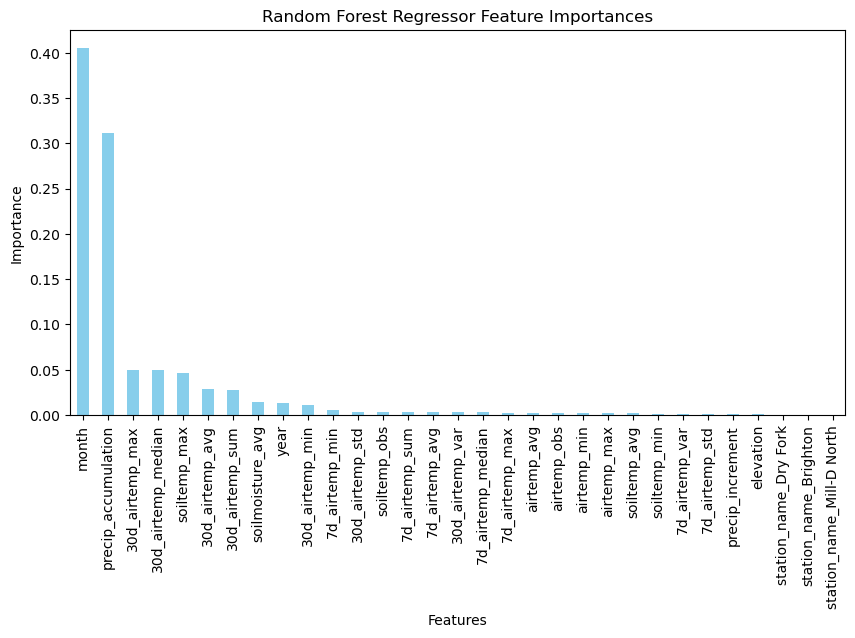

In [125]:
imps = rf_model.feature_importances_
for i, v in enumerate(importance):
    print(f"Feature: {X_train.columns[i]}, Importance: {v}")

rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)

plt.subplots(figsize=(10, 5))
rf_feat_imps.plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Regressor Feature Importances')
plt.show()


In [111]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [147]:
#Model 3: Support Vector Machine (SVM)
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print(f"SVM MSE: {mean_squared_error(y_test, y_pred_svm)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_svm))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_svm)}")
print(f"R² Score: {r2_score(y_test, y_pred_svm)}")

SVM MSE: 94.64615665135624
RMSE: 9.728625630136882
MAE: 6.4397923906857155
R² Score: 0.8491234313729555


In [164]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.2f}")

print("Random Forest Evaluation:")
evaluate_model(y_test, y_pred_rf)
print()
print("Support Vector Machine Evaluation:")
evaluate_model(y_test, y_pred_svm)
print()
print("Decision Tree Evaluation:")
evaluate_model(y_test, y_pred_dt)


Random Forest Evaluation:
Mean Squared Error (MSE): 9.16
Root Mean Squared Error (RMSE): 3.03
Mean Absolute Error (MAE): 2.01
R² Score: 0.99

Support Vector Machine Evaluation:
Mean Squared Error (MSE): 94.65
Root Mean Squared Error (RMSE): 9.73
Mean Absolute Error (MAE): 6.44
R² Score: 0.85

Decision Tree Evaluation:
Mean Squared Error (MSE): 21.39
Root Mean Squared Error (RMSE): 4.62
Mean Absolute Error (MAE): 2.67
R² Score: 0.97


In [175]:
#Fine-tune hyperparameters
#GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Fixed: Removed 'auto'
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid_rf,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1,
                           verbose=3)

grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {-grid_search.best_score_:.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 10.7871


In [177]:
# Predict using the best model
best_model = grid_search.best_estimator_  # Replace with random_search.best_estimator_ if using RandomizedSearchCV
y_pred = best_model.predict(X_test)

# Evaluate performance
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

MSE: 8.98
R² Score: 0.99


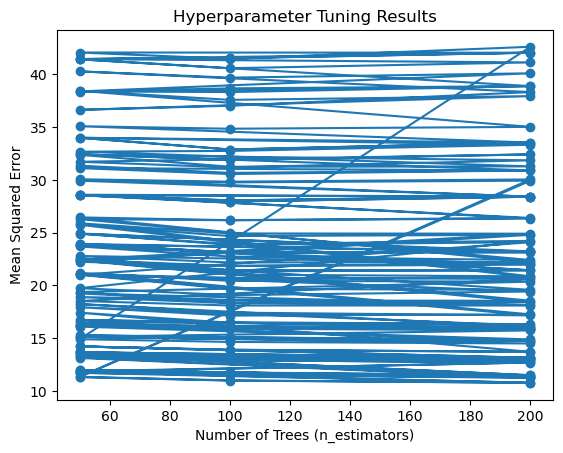

In [179]:
results = grid_search.cv_results_
param_counts = [n for n in results['param_n_estimators']]
mse_scores = [-score for score in results['mean_test_score']]

plt.plot(param_counts, mse_scores, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Squared Error')
plt.title('Hyperparameter Tuning Results')
plt.show()


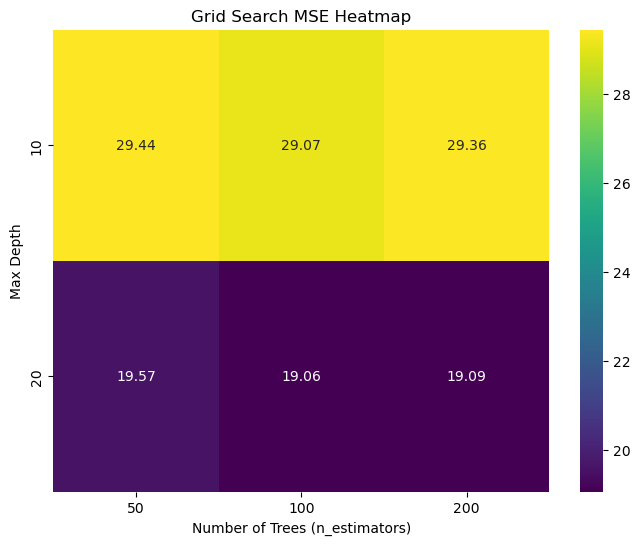

In [183]:
results_df = pd.DataFrame(grid_search.cv_results_)

# Pivot table for heatmap
heatmap_data = results_df.pivot_table(values='mean_test_score', 
                                      index='param_max_depth', 
                                      columns='param_n_estimators')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(-heatmap_data, annot=True, fmt=".2f", cmap="viridis")  # Convert scores to positive for visualization
plt.title('Grid Search MSE Heatmap')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Max Depth')
plt.show()

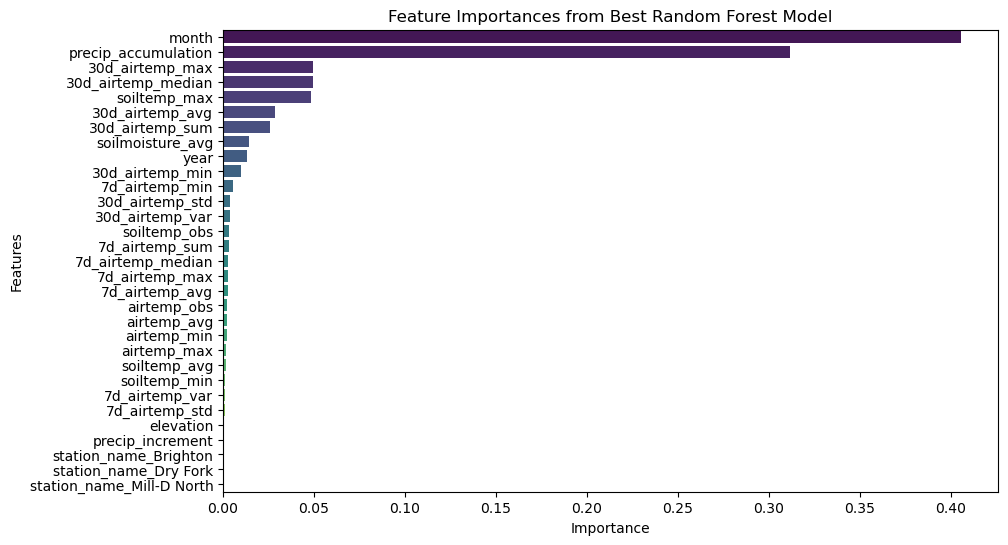

In [187]:
best_model = grid_search.best_estimator_
feature_importances = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis", hue= 'Feature', legend=False)
plt.title('Feature Importances from Best Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [170]:

from sklearn.model_selection import RandomizedSearchCV

RANDOM_STATE = 42

param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=RANDOM_STATE),
                                   param_distributions=param_dist_rf,
                                   n_iter=20,  
                                   scoring='neg_mean_squared_error',  
                                   cv=5,  
                                   random_state=RANDOM_STATE,  
                                   n_jobs=-1)  
random_search.fit(X_train, y_train)

# Output the best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {-random_search.best_score_:.4f}")  # Convert negative MSE to positive for readability

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 20}
Best Score: 10.7930


In [ ]:
# Bayesian Optimization (Optuna)

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 200)
    max_depth = trial.suggest_int("max_depth", 5, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=RANDOM_STATE
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print(f"Best Trial: {study.best_trial}")
print(f"Best Hyperparameters: {study.best_trial.params}")


In [ ]:
final_rf_model = RandomForestRegressor(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    random_state=RANDOM_STATE
)
final_rf_model.fit(X_train, y_train)
y_pred_final_rf = final_rf_model.predict(X_test)

print(f"Final Random Forest MSE: {mean_squared_error(y_test, y_pred_final_rf)}")
print(f"Final R² Score: {r2_score(y_test, y_pred_final_rf)}")